In [2]:
import xarray as xr
import xarray.plot as xplt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


## Make a "climatology"

In [4]:
dates = pd.date_range('2020-08-01', '2020-10-31')

fnames = '../2020/FWI_IMERG/WESTUS_FWI.IMERG.FINAL.v6.Daily.Default.'+dates.strftime('%Y%m%d')+'.nc'
print(len(fnames))

ds = xr.open_mfdataset(fnames.values,concat_dim='time',combine='nested',compat='override', coords='all')
ds = ds.assign_coords({'time': dates}) #assign coords so we can resample along time


92


In [51]:
print(ds)

<xarray.Dataset>
Dimensions:              (lat: 180, lon: 240, time: 92)
Coordinates:
  * lat                  (lat) float64 31.05 31.15 31.25 ... 48.75 48.85 48.95
  * lon                  (lon) float64 -124.9 -124.8 -124.8 ... -101.1 -101.0
  * time                 (time) datetime64[ns] 2020-08-01 ... 2020-10-31
Data variables:
    IMERG.FINAL.v6_BUI   (time, lat, lon) float32 dask.array<chunksize=(1, 180, 240), meta=np.ndarray>
    IMERG.FINAL.v6_DC    (time, lat, lon) float32 dask.array<chunksize=(1, 180, 240), meta=np.ndarray>
    IMERG.FINAL.v6_DMC   (time, lat, lon) float32 dask.array<chunksize=(1, 180, 240), meta=np.ndarray>
    IMERG.FINAL.v6_DSR   (time, lat, lon) float32 dask.array<chunksize=(1, 180, 240), meta=np.ndarray>
    IMERG.FINAL.v6_FFMC  (time, lat, lon) float32 dask.array<chunksize=(1, 180, 240), meta=np.ndarray>
    IMERG.FINAL.v6_FWI   (time, lat, lon) float32 dask.array<chunksize=(1, 180, 240), meta=np.ndarray>
    IMERG.FINAL.v6_ISI   (time, lat, lon) float32 

In [69]:
print(len(ds['lat'].values))

180


In [74]:
fwi = ds['IMERG.FINAL.v6_FWI'].chunk(chunks={'time':len(dates),'lat':len(ds['lat'].values),'lon':len(ds['lon'].values)})
print(fwi)

<xarray.DataArray 'IMERG.FINAL.v6_FWI' (time: 92, lat: 180, lon: 240)>
dask.array<rechunk-merge, shape=(92, 180, 240), dtype=float32, chunksize=(92, 180, 240), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 31.05 31.15 31.25 31.35 ... 48.65 48.75 48.85 48.95
  * lon      (lon) float64 -124.9 -124.8 -124.8 -124.6 ... -101.2 -101.1 -101.0
  * time     (time) datetime64[ns] 2020-08-01 2020-08-02 ... 2020-10-31
Attributes:
    short_name:  IMERG.FINAL.v6_FWI
    long_name:   IMERG.FINAL.v6 Fire Weather Index
    units:       


In [79]:
print(fwi.quantile([0,.28,.57,.84,.98,1]))
print(fwi.quantile([0,.28,.57,.84,.98,1]).values)


<xarray.DataArray 'IMERG.FINAL.v6_FWI' (quantile: 6)>
dask.array<transpose, shape=(6,), dtype=float64, chunksize=(6,), chunktype=numpy.ndarray>
Coordinates:
  * quantile  (quantile) float64 0.0 0.28 0.57 0.84 0.98 1.0
[3.92656530e-09 3.31731786e+01 5.16587920e+01 6.87574496e+01
 9.72966022e+01 2.17714035e+02]


/home/lthapa/anaconda3/envs/ML_py/lib/python3.7/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


In [35]:
ds = xr.Dataset(

    {"a": (("x", "y"), [[0.7, 0.2, 9.4, 1.5], [6.5, 7.3, 2.6, 1.9]])},

    coords={"x": [7, 9], "y": [1, 1.5, 2, 2.5]},

)
print(ds.quantile([0,.25,.5,.75,1]))
print(ds.quantile([0,.25,.5,.75,1],dim='x'))

<xarray.Dataset>
Dimensions:   (quantile: 5)
Coordinates:
  * quantile  (quantile) float64 0.0 0.25 0.5 0.75 1.0
Data variables:
    a         (quantile) float64 0.2 1.3 2.25 6.7 9.4
<xarray.Dataset>
Dimensions:   (quantile: 5, y: 4)
Coordinates:
  * y         (y) float64 1.0 1.5 2.0 2.5
  * quantile  (quantile) float64 0.0 0.25 0.5 0.75 1.0
Data variables:
    a         (quantile, y) float64 0.7 0.2 2.6 1.5 2.15 ... 1.8 6.5 7.3 9.4 1.9


## Use Canada thresholds on FIREX-AQ Days

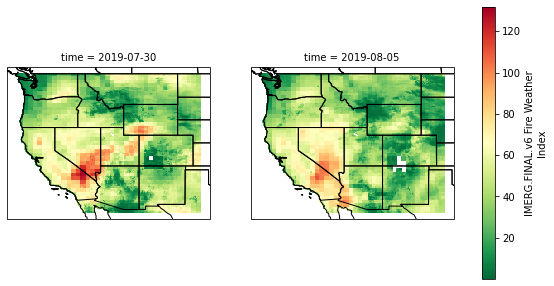

In [115]:
dates = pd.date_range('2019-07-30', '2019-08-05',freq='6D')

fnames = '../2019/FWI_IMERG/WESTUS_FWI.IMERG.FINAL.v6.Daily.Default.'+dates.strftime('%Y%m%d')+'.nc'
ds = xr.open_mfdataset(fnames.values,concat_dim='time',combine='nested',compat='override', coords='all')['IMERG.FINAL.v6_FWI']
ds = ds.assign_coords({'time': dates}) 


p = ds.plot(

    transform=ccrs.PlateCarree(),
    col="time",
    subplot_kws={"projection": ccrs.PlateCarree()},cmap='RdYlGn_r',figsize=[10,5],

)

for ax in p.axes.flat:
    ax.coastlines()
    ax.add_feature(cfeature.STATES, linestyle='-')

plt.show()

<xarray.DataArray 'FWI_Class' (time: 2, lat: 180, lon: 240)>
array([[[nan, nan, nan, ...,  2.,  2.,  2.],
        [nan, nan, nan, ...,  2.,  2.,  2.],
        [nan, nan, nan, ...,  2.,  2.,  2.],
        ...,
        [ 1.,  1.,  1., ...,  2.,  2.,  2.],
        [ 1.,  1.,  1., ...,  2.,  2.,  2.],
        [ 1.,  1.,  1., ...,  2.,  2.,  2.]],

       [[nan, nan, nan, ...,  2.,  2.,  2.],
        [nan, nan, nan, ...,  2.,  2.,  2.],
        [nan, nan, nan, ...,  2.,  2.,  2.],
        ...,
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  2.,  2.,  3.],
        [ 1.,  1.,  1., ...,  2.,  2.,  3.]]])
Coordinates:
  * time     (time) datetime64[ns] 2019-07-30 2019-08-05
  * lat      (lat) float64 31.05 31.15 31.25 31.35 ... 48.65 48.75 48.85 48.95
  * lon      (lon) float64 -124.9 -124.8 -124.8 -124.6 ... -101.2 -101.1 -101.0


/home/lthapa/anaconda3/envs/ML_py/lib/python3.7/site-packages/xarray/plot/facetgrid.py:390: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout()


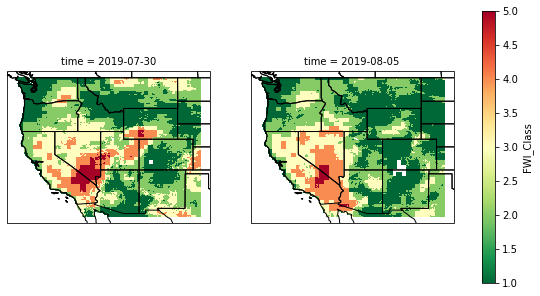

In [12]:
dates = pd.date_range('2019-07-30', '2019-08-05',freq='6D')

fnames = '../2019/FWI_IMERG/WESTUS_FWI.IMERG.FINAL.v6.Daily.Default.'+dates.strftime('%Y%m%d')+'.nc'
ds = xr.open_mfdataset(fnames.values,concat_dim='time',combine='nested',compat='override', coords='all')
ds = ds.assign_coords({'time': dates})

df_fwi = ds['IMERG.FINAL.v6_FWI'].to_dataframe(name='FWI')
df_fwi['FWI_Class'] = pd.cut(df_fwi['FWI'].values,
                             #bins=[0,1,3,10,20,500], Canadian Values
                                bins=[0,33,52,69,97,500],#Laura's 2020-derived values
                            labels=[1,2,3,4,5])
dat_fwi = df_fwi.to_xarray()['FWI_Class']
print(dat_fwi)

p = dat_fwi.plot(

    transform=ccrs.PlateCarree(),
    col="time",
    subplot_kws={"projection": ccrs.PlateCarree()},cmap='RdYlGn_r',figsize=[10,5],

)

for ax in p.axes.flat:
    ax.coastlines()
    ax.add_feature(cfeature.STATES, linestyle='-')

plt.show()

## Nov 14th Update

/home/lthapa/anaconda3/envs/ML_py/lib/python3.7/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


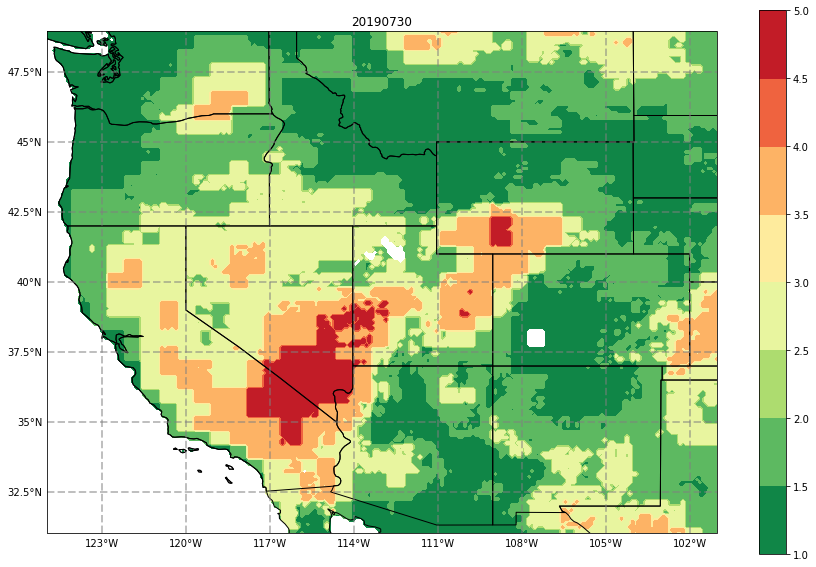

/home/lthapa/anaconda3/envs/ML_py/lib/python3.7/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


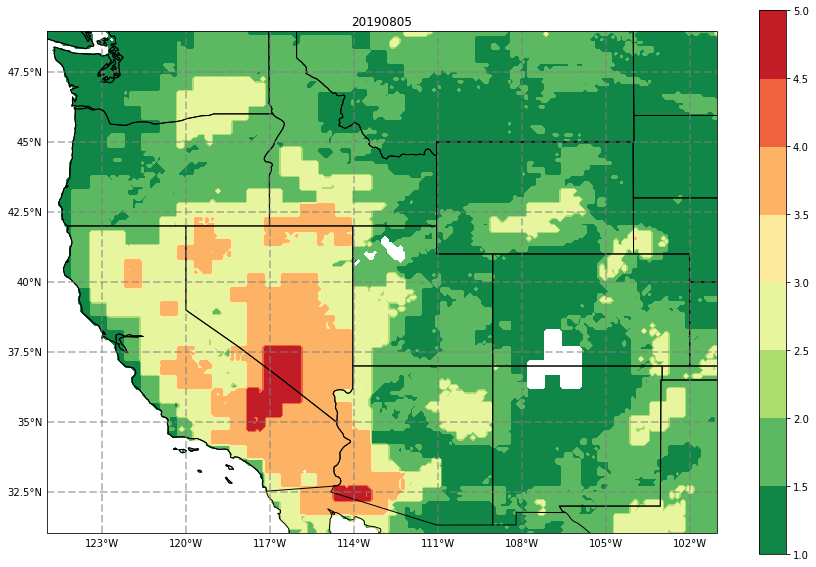

In [3]:
dates = ['20190730','20190805']
for ii in range(len(dates)):
    fname = '../2019/FWI_IMERG/WESTUS_FWI.IMERG.FINAL.v6.Daily.Default.'+dates[ii]+'.nc'
    dat = xr.open_dataset(fname) #july30
    df_fwi = dat['IMERG.FINAL.v6_FWI'].to_dataframe(name='FWI')
    df_fwi['FWI_Class'] = pd.cut(df_fwi['FWI'].values,
                             #bins=[0,1,3,10,20,500], Canadian Values
                                bins=[0,33,52,69,97,500],#Laura's 2020-derived values
                            labels=[1,2,3,4,5])
    dat_fwi = df_fwi.to_xarray()

    LON,LAT = np.meshgrid(dat_fwi['lon'].values,dat_fwi['lat'].values)
    #g = dat_fwi['FWI_Class'].plot.pcolormesh(x="lon", y="lat", col="time")
    
    #make a map of the FCCS data
    fig = plt.figure(figsize=(15,10))
    ax= fig.add_subplot(111,projection=ccrs.PlateCarree())
    plt.contourf(LON, LAT, np.squeeze(dat_fwi['FWI_Class'].values),cmap='RdYlGn_r')
    ax.coastlines()
    ax.add_feature(cfeature.STATES, linestyle='-')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,\
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    plt.colorbar()
    plt.title(dates[ii])
    plt.show()

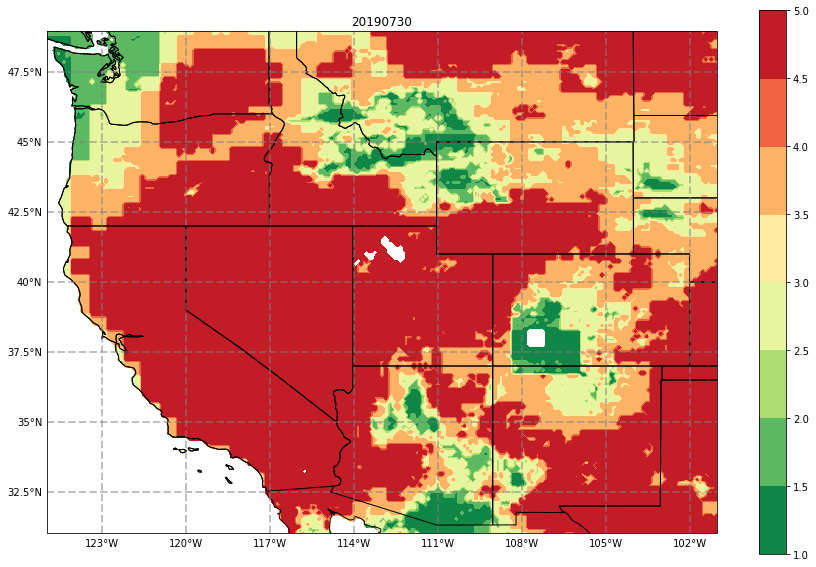

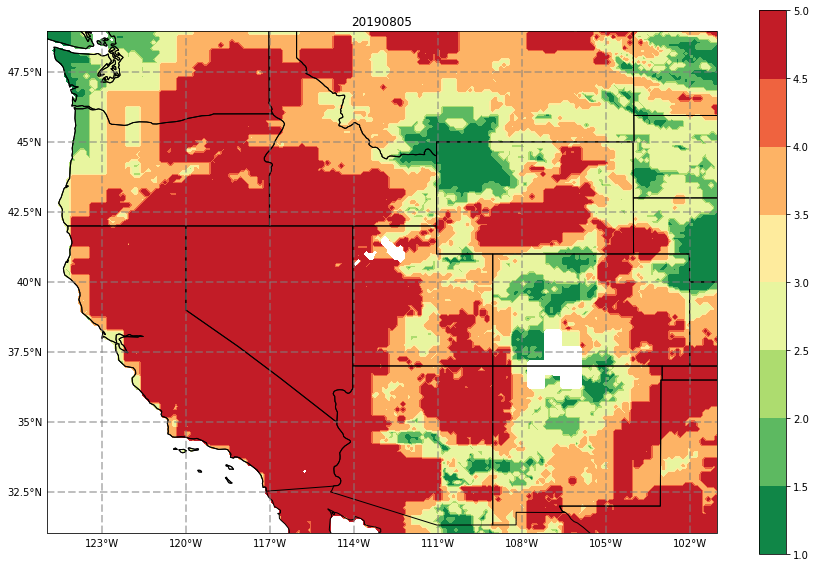

In [61]:
dates = ['20190730','20190805']
for ii in range(len(dates)):
    fname = '../2019/FWI_IMERG/WESTUS_FWI.IMERG.FINAL.v6.Daily.Default.'+dates[ii]+'.nc'
    dat = xr.open_dataset(fname) #july30
    df_fwi = dat['IMERG.FINAL.v6_DSR'].to_dataframe(name='FWI')
    df_fwi['FWI_Class'] = pd.cut(df_fwi['FWI'].values,
                             bins=[0,1,3,10,20,500], #Canadian Values
                                #bins=[0,1,52,69,97,500],#Laura's 2020-derived values
                            labels=[1,2,3,4,5])
    dat_fwi = df_fwi.to_xarray()

    LON,LAT = np.meshgrid(dat_fwi['lon'].values,dat_fwi['lat'].values)
    #g = dat_fwi['FWI_Class'].plot.pcolormesh(x="lon", y="lat", col="time")
    
    #make a map of the FCCS data
    fig = plt.figure(figsize=(15,10))
    ax= fig.add_subplot(111,projection=ccrs.PlateCarree())
    plt.contourf(LON, LAT, np.squeeze(dat_fwi['FWI_Class'].values),cmap='RdYlGn_r')
    ax.coastlines()
    ax.add_feature(cfeature.STATES, linestyle='-')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,\
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    plt.colorbar()
    plt.title(dates[ii])
    plt.show()

/home/lthapa/anaconda3/envs/ML_py/lib/python3.7/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


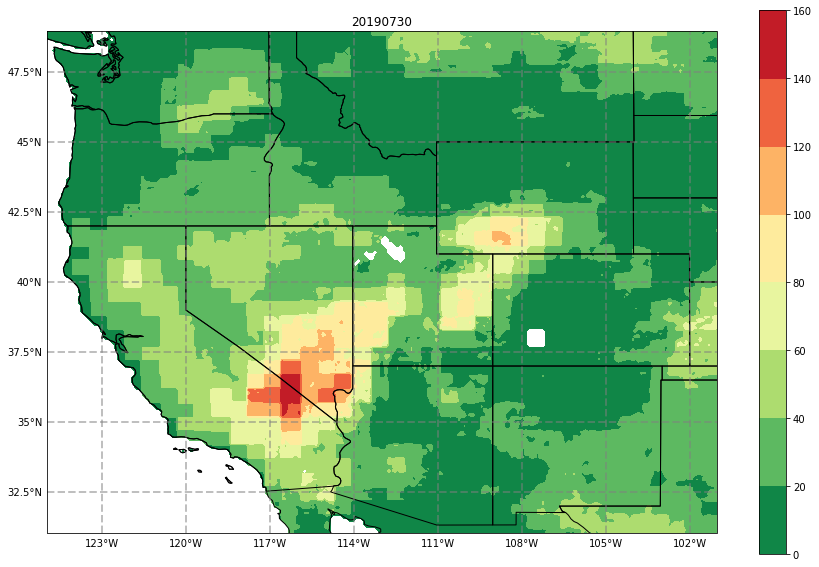

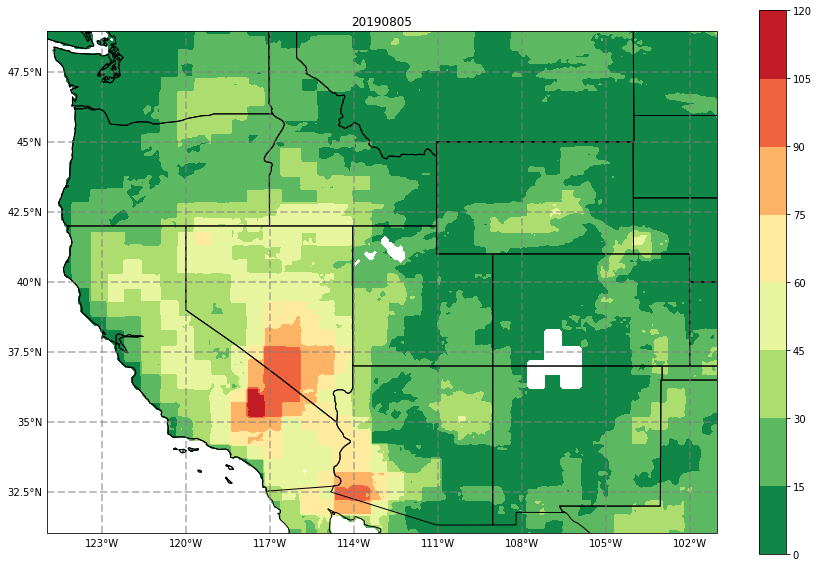

In [58]:
dates = ['20190730','20190805']
for ii in range(len(dates)):
    fname = '../2019/FWI_IMERG/WESTUS_FWI.IMERG.FINAL.v6.Daily.Default.'+dates[ii]+'.nc'
    dat = xr.open_dataset(fname) #july30

    LON,LAT = np.meshgrid(dat['lon'].values,dat['lat'].values)
    #g = dat_fwi['FWI_Class'].plot.pcolormesh(x="lon", y="lat", col="time")
    
    #make a map of the FCCS data
    fig = plt.figure(figsize=(15,10))
    ax= fig.add_subplot(111,projection=ccrs.PlateCarree())
    plt.contourf(LON, LAT, np.squeeze(dat['IMERG.FINAL.v6_DSR'].values),cmap='RdYlGn_r')
    ax.coastlines()
    ax.add_feature(cfeature.STATES, linestyle='-')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,\
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    plt.colorbar()
    plt.title(dates[ii])
    plt.show()